In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_palette("bright")

plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [3]:
iris = load_iris()

X = iris.data
y = iris.target

In [4]:
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_

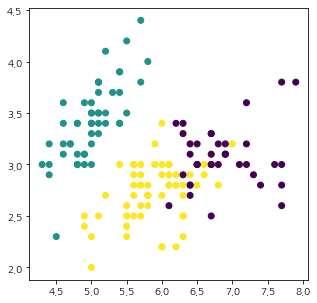

In [5]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(X[:,0], X[:,1], c=labels.astype(np.float))

In [6]:
centers = kmeans.cluster_centers_
centers

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

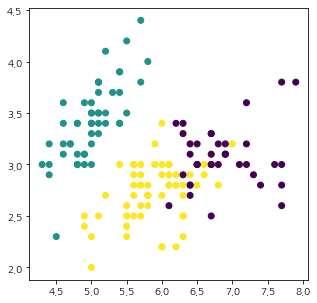

In [7]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(X[:,0], X[:,1], c=labels.astype(np.float))

In [8]:
label = 0
idx_cls = np.where(labels == label)[0]
X0_cls = X[idx_cls, 0]
X1_cls = X[idx_cls, 1]

X0_dist = X0_cls - centers[label, 0]
X1_dist = X1_cls - centers[label, 1]

In [9]:
np.sqrt(X0_dist**2 + X1_dist**2).argmax()

24

In [10]:
centers[0][:2]

array([6.85      , 3.07368421])

In [11]:
np.linalg.norm([X0_dist, X1_dist])

3.4854962645979577

In [12]:
def cal_radius(label, centers):
    idx_cls = np.where(labels == label)[0]
    X0_cls = X[idx_cls, 0]
    X1_cls = X[idx_cls, 1]

    X0_dist = X0_cls - centers[label, 0]
    X1_dist = X1_cls - centers[label, 1]
    return np.sqrt(X0_dist**2 + X1_dist**2).max()

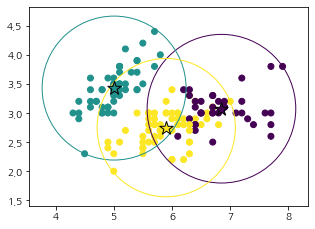

In [14]:
from matplotlib.patches import Circle
from matplotlib import cm

fig, ax = plt.subplots(figsize=(5,5))

cmap = cm.get_cmap('viridis', 3)
ax.scatter(X[:,0], X[:,1], c=labels.astype(np.float), cmap=cmap)
ax.set_aspect("equal")

for i in range(3):
    r = cal_radius(i, centers)
    circle = Circle(centers[i], r, ec=cmap.colors[i], fc="none")
    ax.add_patch(circle)
    ax.scatter(centers[i][0], centers[i][1], marker="*", s=200, ec="k", fc=cmap.colors[i], zorder=3)